In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from scipy.spatial.distance import pdist, squareform

# Notebook 2.2: EDA II

## Making a heatmap for the categories

In [11]:
GENE_VALS = pd.read_csv('mgphot_gene_values.tsv', 
                 sep='\t',                  # Specify tab as delimiter for TSV files
                 on_bad_lines='skip')

GENE_NAMES = pd.read_csv('mgphot_genes.tsv',
                        sep='\t',
                        on_bad_lines='skip')

HOT100 = pd.read_csv('hot100_charts.tsv',
                        sep='\t',
                        on_bad_lines='skip')

In [12]:
import ast

GENE_VALS['gene_values'] = GENE_VALS['gene_values'].apply(lambda x: ast.literal_eval("".join(x)))
#using ast to turn this fix the list (before it was like ['[','0','.','4',',',' '])

In [4]:
INSTRUMENTS = GENE_VALS['gene_values'].apply(lambda x: x[19:35]).apply(pd.Series)
INSTRUMENTS.columns = GENE_NAMES['name'].iloc[19:35].tolist()
INSTRUMENTS.index = GENE_VALS['mgphot_track_id'].values
INSTRUMENTS.index.name = 'mgphot_track_id'

INSTRUMENTS['year'] = GENE_VALS['year'].values
INSTRUMENTS.head()

,Drum Set,Drum Aggressiveness,Synthetic Drums,Percussion,Electric Guitar,Electric Guitar Distortion,Acoustic Guitar,String Ensemble,Horn Ensemble,Piano,Organ,Rhodes,Synthesizer,Synth Timbre,Bass Guitar,Reed Instrument,year
mgphot_track_id,,,,,,,,,,,,,,,,,
1,0.4,0.2,0.0,0.0,0.0,0.0,0.6,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,1958
2,0.6,0.5,0.0,0.0,0.6,0.3,0.0,0.0,0.7,0.6,0.0,0.0,0.0,0.0,0.6,0.5,1958
3,0.5,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.0,0.6,0.6,1958
4,0.6,0.4,0.0,0.2,0.6,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.4,0.4,1958
5,0.6,0.6,0.0,0.0,0.5,0.2,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.5,1958


In [5]:
VOCALS = GENE_VALS['gene_values'].apply(lambda x: x[0:7]).apply(pd.Series)
VOCALS.columns = GENE_NAMES['name'].iloc[0:7].tolist()
VOCALS.index = GENE_VALS['mgphot_track_id'].values
VOCALS.index.name = 'mgphot_track_id'

VOCALS['year'] = GENE_VALS['year'].values
VOCALS.head()

,Vocal Register,Vocal Timbre Thin to Full,Vocal Breathiness,Vocal Smoothness,Vocal Grittiness,Vocal Nasality,Vocal Accompaniment,year
mgphot_track_id,,,,,,,,
1,0.4,1.0,0.6,0.9,0.0,0.0,0.5,1958
2,0.4,0.8,0.5,0.8,0.2,0.4,0.0,1958
3,0.3,0.7,0.4,0.3,0.7,0.5,0.0,1958
4,0.5,0.6,0.3,0.2,0.6,0.4,0.0,1958
5,0.6,0.7,0.2,0.4,0.4,0.6,0.0,1958


In [6]:
HARMONY = GENE_VALS['gene_values'].apply(lambda x: x[7:9]).apply(pd.Series)
HARMONY.columns = GENE_NAMES['name'].iloc[7:9].tolist()
HARMONY.index = GENE_VALS['mgphot_track_id'].values
HARMONY.index.name = 'mgphot_track_id'

HARMONY['year'] = GENE_VALS['year'].values
HARMONY.head()

,Minor / Major Key Tonality,Harmonic Sophistication,year
mgphot_track_id,,,
1,1.0,0.3,1958
2,0.8,0.5,1958
3,1.0,0.3,1958
4,1.0,0.3,1958
5,1.0,0.2,1958


In [7]:
RHYTHM = GENE_VALS['gene_values'].apply(lambda x: x[9:19]).apply(pd.Series)
RHYTHM.columns = GENE_NAMES['name'].iloc[9:19].tolist()
RHYTHM.index = GENE_VALS['mgphot_track_id'].values
RHYTHM.index.name = 'mgphot_track_id'

RHYTHM['year'] = GENE_VALS['year'].values
RHYTHM.head()

,Tempo,Cut Time Feel,Triple Meter,Compound Meter,Odd Meter,Swing Feel,Shuffle Feel,Syncopation Low to High,Backbeat,Danceability,year
mgphot_track_id,,,,,,,,,,,
1,0.3,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.4,0.4,1958
2,0.4,0.5,0.0,0.0,0.0,1.0,0.0,0.5,0.4,0.7,1958
3,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.4,0.6,1958
4,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.4,0.6,1958
5,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.4,0.8,1958


In [8]:
LYRICS = GENE_VALS['gene_values'].apply(lambda x: x[35:43]).apply(pd.Series)
LYRICS.columns = GENE_NAMES['name'].iloc[35:43].tolist()
LYRICS.index = GENE_VALS['mgphot_track_id'].values
LYRICS.index.name = 'mgphot_track_id'

LYRICS['year'] = GENE_VALS['year'].values
LYRICS.head()

,Angry Lyrics,Sad Lyrics,Happy/Joyful Lyrics,Humorous Lyrics,Love/Romance Lyrics,Social/Political Lyrics,Abstract Lyrics,Explicit Lyrics,year
mgphot_track_id,,,,,,,,,
1,0.0,0.4,0.6,0.0,1.0,0.0,0.0,0.0,1958
2,0.0,0.0,0.8,0.0,0.7,0.0,0.0,0.0,1958
3,0.0,0.6,0.4,0.7,0.5,0.3,0.0,0.3,1958
4,0.0,0.2,0.8,0.7,0.4,0.0,0.0,0.0,1958
5,0.0,0.0,0.0,0.4,0.6,0.0,0.2,0.0,1958


In [9]:
SONORITY = GENE_VALS['gene_values'].apply(lambda x: x[43:49]).apply(pd.Series)
SONORITY.columns = GENE_NAMES['name'].iloc[43:49].tolist()
SONORITY.index = GENE_VALS['mgphot_track_id'].values
SONORITY.index.name = 'mgphot_track_id'

SONORITY['year'] = GENE_VALS['year'].values
SONORITY.head()

,Live Recording,Audio Production,Aural Intensity,Acoustic Sonority,Electric Sonority,Synthetic Sonority,year
mgphot_track_id,,,,,,,
1,0.0,0.7,0.4,1.0,0.2,0.0,1958
2,0.0,0.6,0.5,1.0,0.2,0.0,1958
3,0.0,0.5,0.5,0.4,0.8,0.0,1958
4,0.0,0.5,0.5,1.0,0.2,0.0,1958
5,0.0,0.4,0.6,0.8,0.4,0.0,1958


In [10]:
COMPOSITION = GENE_VALS['gene_values'].apply(lambda x: x[49:]).apply(pd.Series)
COMPOSITION.columns = GENE_NAMES['name'].iloc[49:].tolist()
COMPOSITION.index = GENE_VALS['mgphot_track_id'].values
COMPOSITION.index.name = 'mgphot_track_id'

COMPOSITION['year'] = GENE_VALS['year'].values
COMPOSITION.head()

,Focus on Lead Vocal,Focus on Lyrics,Focus on Melody,Focus on Vocal Accompaniment,Focus on Rhythmic Groove,Focus on Musical Arrangements,Focus on Form,Focus on Riffs,Focus on Performance,year
mgphot_track_id,,,,,,,,,,
1,1.0,0.8,0.9,0.6,0.6,0.6,0.6,0.7,0.6,1958
2,1.0,0.8,1.0,0.0,0.6,0.9,0.6,0.4,0.6,1958
3,1.0,0.8,0.3,0.0,0.3,0.6,0.6,0.4,0.6,1958
4,1.0,0.7,0.5,0.0,0.4,0.6,0.6,0.3,0.6,1958
5,1.0,0.8,0.6,0.0,0.8,0.6,0.6,0.6,0.6,1958


In [13]:
from skbio.stats.distance import mantel

In [16]:
# Example: category dataframes with subdimensions
categories = {
    "Instrumentation": INSTRUMENTS,
    "Vocals": VOCALS,
    "Harmony": HARMONY,
    "Rhythm": RHYTHM,
    "Lyrics": LYRICS,
    "Sonority": SONORITY,
    "Composition": COMPOSITION.drop(columns=['year'])  # exclude year column
}

# Compute year-by-year distance matrices for each category
year_distance_matrices = {}
for cat, df in categories.items():
    # average per year
    df_year = df.copy()
    df_year['year'] = GENE_VALS['year'].values
    df_year = df_year.groupby('year').mean()
    # distance matrix (years × years)
    dist_matrix = pd.DataFrame(
        squareform(pdist(df_year.values, metric='cosine')),
        index=df_year.index,
        columns=df_year.index
    )
    year_distance_matrices[cat] = dist_matrix

# Compute Mantel correlations between all category pairs
cats = list(year_distance_matrices.keys())
mantel_corrs = pd.DataFrame(index=cats, columns=cats, dtype=float)
for i in range(len(cats)):
    for j in range(len(cats)):
        if i <= j:
            corr, p_val, n = mantel(year_distance_matrices[cats[i]], 
                                    year_distance_matrices[cats[j]],
                                    method='pearson', permutations=10000)
            mantel_corrs.iloc[i, j] = corr
            mantel_corrs.iloc[j, i] = corr  # symmetric

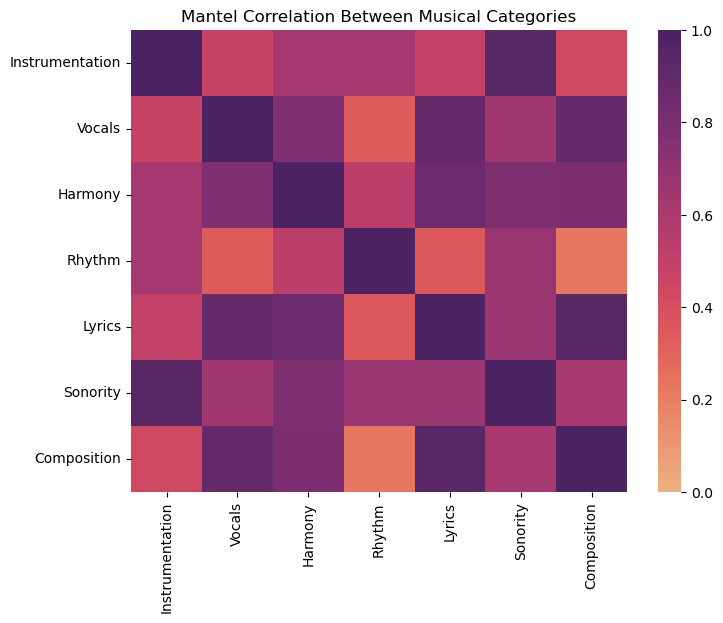

In [27]:
# Ensure all values are numeric
mantel_corrs_numeric = mantel_corrs.astype(float)

# Make sure the index and columns are the same
mantel_corrs_numeric = mantel_corrs_numeric.reindex(index=mantel_corrs_numeric.columns, columns=mantel_corrs_numeric.columns)

plt.figure(figsize=(8,6))
sns.heatmap(
    mantel_corrs_numeric,        
    cmap="flare",
    vmin=0,
    vmax=1
)
plt.title("Mantel Correlation Between Musical Categories")
plt.show()

For Tomorrow,
make a heatmap & complimentary line graph that takes:
- Tonality from bimmuda (melodic complexity)
- Unique word ratio from bimmuda
- Number of Unique Words from bimmuda
- Harmonic Sophistication from MGPhot
- Something to do with rhythm (focus on rhythmic groove?)

Also make a scatter plot with audio production vs live performance
- main idea is that: even tho most things got simpler over time, does the rise in audio production suggest otherwise?

Things to annotate:
- Release of casette, vinyl, and cds
- first streaming service (or release of ipod)
- release of first DAW
- release of first audio interface
- Historical events of music (woodstock, vietnam war, first synthesizer, idk?)

## Let's try someting else...
(i don't really understand what I was doing in the last heatmap)

In [38]:
COMPLEXITY = pd.DataFrame()

HARM_COMPLEX = GENE_VALS['gene_values'].apply(lambda x: x[8])  #had to get rid of the pd.Series so this returns floats 
RHYTHM_COMPLEX = GENE_VALS['gene_values'].apply(lambda x: x[53])                     #rather than 1-dimensional arrays
RHYTHM_COMPLEX2 = GENE_VALS['gene_values'].apply(lambda x: x[16])
RHYTHM_COMPLEX3 = GENE_VALS['gene_values'].apply(lambda x: x[13])

COMPLEXITY['Harmonic_Complexity'] = HARM_COMPLEX.values
COMPLEXITY['Rhythmic_Complexity'] = RHYTHM_COMPLEX.values
COMPLEXITY['Syncopation'] = RHYTHM_COMPLEX2.values
COMPLEXITY['Odd_Meter'] = RHYTHM_COMPLEX3.values
COMPLEXITY['year'] = GENE_VALS['year'].values
df_melted = pd.melt(COMPLEXITY, id_vars=['year'], value_vars=['Harmonic_Complexity', 'Rhythmic_Complexity','Syncopation','Odd_Meter'],
                    var_name='Complexity_Type', value_name='value')

yearly_avg = df_melted.groupby(['year', 'Complexity_Type'])['value'].mean().reset_index()
yearly_avg

,year,Complexity_Type,value
0,1958,Harmonic_Complexity,0.345614
1,1958,Odd_Meter,0.000585
2,1958,Rhythmic_Complexity,0.649708
3,1958,Syncopation,0.450877
4,1959,Harmonic_Complexity,0.351136
...,...,...,...
255,2021,Syncopation,0.528805
256,2022,Harmonic_Complexity,0.360731
257,2022,Odd_Meter,0.000000
258,2022,Rhythmic_Complexity,0.713699


/tmp/ipykernel_135/688740524.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=yearly_avg, x='year', y='value', hue='Complexity_Type', ci=None)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

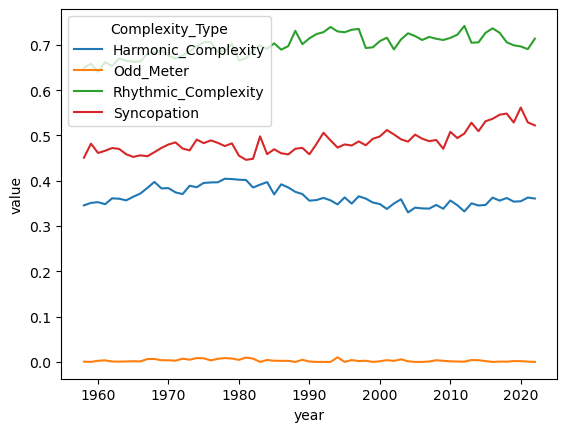

In [39]:
sns.lineplot(data=yearly_avg, x='year', y='value', hue='Complexity_Type', ci=None)
plt.show()

/tmp/ipykernel_135/2593126215.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_melted, x='year', y='value', hue='Complexity_Type', ci=None)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in 

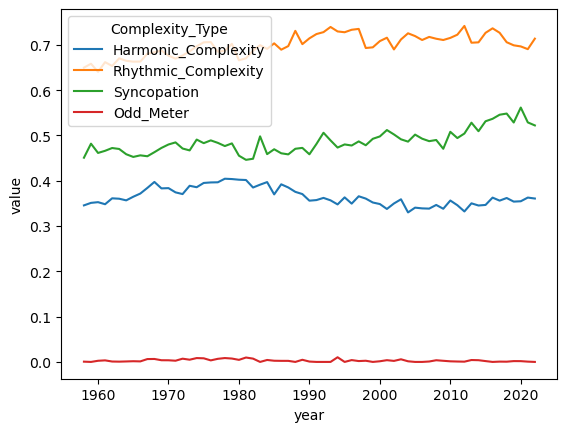

In [40]:
sns.lineplot(data=df_melted, x='year', y='value', hue='Complexity_Type', ci=None)
plt.show()   #Maybe only use harmonic complexity -- rhythm too hard to quantify with this

In [55]:
df = pd.read_csv('bimmuda_per_melody_full.csv')
df2 = df[['ID','Year','Position','Tonality','MIC','RIC']]
SONGS = df2.set_index(['Position','ID'])
SONGS.head()

Year  Tonality       MIC       RIC
Position ID                                           
1        1950_01_1  1950      0.77  4.280600  2.937204
         1950_01_2  1950      0.82  4.863496  2.316326
2        1950_02_1  1950      0.79  5.462931  1.105103
         1950_02_2  1950      0.68  4.455394  1.283377
3        1950_03_1  1950      0.58  2.801082  2.066878

In [67]:
df_melted2 = pd.melt(SONGS, id_vars=['Year'], value_vars=['Tonality', 'MIC','RIC'],
                    var_name='Harmonic Type', value_name='value')

yearly_avg2 = df_melted2.groupby(['Year', 'Harmonic Type'])['value'].mean().reset_index()
yearly_avg2

,Year,Harmonic Type,value
0,1950,MIC,3.895753
1,1950,RIC,2.154021
2,1950,Tonality,0.689333
3,1951,MIC,4.578839
4,1951,RIC,2.203381
...,...,...,...
214,2021,RIC,1.766052
215,2021,Tonality,0.694667
216,2022,MIC,2.668718
217,2022,RIC,1.782387


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_old

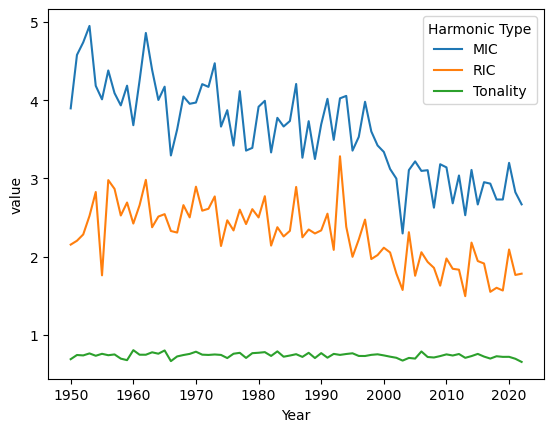

In [68]:
sns.lineplot(data=yearly_avg2, x='Year', y='value', hue='Harmonic Type')
plt.show()        #hmm we def keeping these 3...
#rhythm is better expressed with this dataset, even though its just the top 5

In [176]:
SONGS.head()

Year  Tonality       MIC       RIC
Position ID                                           
1        1950_01_1  1950      0.77  4.280600  2.937204
         1950_01_2  1950      0.82  4.863496  2.316326
2        1950_02_1  1950      0.79  5.462931  1.105103
         1950_02_2  1950      0.68  4.455394  1.283377
3        1950_03_1  1950      0.58  2.801082  2.066878

In [177]:
x = pd.read_csv('bimmuda_per_song_full.csv')
x2 = x[['Title','Artist','Year','Position', 'Unique Word Ratio']]
SONGS2 = x2.set_index(['Position','Title']).fillna(0)
SONGS2

,,Artist,Year,Unique Word Ratio
Position,Title,,,
1,Goodnight Irene,Gordon Jenkins & The Weavers,1950,0.43
2,Mona Lisa,Nat King Cole,1950,0.38
3,Third Man Theme,Anton Karas,1950,0.00
4,Sam's Song,Gary & Bing Crosby,1950,0.42
5,Simple Melody,Gary & Bing Crosby,1950,0.28
...,...,...,...,...
1,Heat Waves,Glass Animals,2022,0.28
2,As It Was,Harry Styles,2022,0.41
3,Stay,Kid Laroi and Justin Bieber,2022,0.23


In [178]:
SONGS3 = pd.merge(SONGS.reset_index(), SONGS2.reset_index(), on=['Year','Position'])
SONGS3 = SONGS3[(SONGS3['Year'] >= 1958) & (SONGS3['Year'] <= 2022)] #filtering out so it matches the other data
SONGS3 = SONGS3.set_index(['Title','Artist','Position','ID'])
SONGS3.head(20)


Year  \
Title                           Artist              Position ID                 
Volare (Nel blu dipinto di blu) Domenico Modugno    1        1958_01_1   1958   
                                                             1958_01_1   1958   
                                                             1958_01_2   1958   
                                                             1958_01_2   1958   
                                                             1958_01_3   1958   
                                                             1958_01_3   1958   
All I Have to Do Is Dream       The Everly Brothers 2a       1958_02a_1  1958   
                                                             1958_02a_2  1958   
Claudette                       The Everly Brothers 2b       1958_02b_1  1958   
                                                             1958_02b_2  1958   
Don't                           Elvis Presley       3a       1958_03a_1  1958   
                                                             1958_03a_2  1958   
                                                             1958_03a_3  1958   
                                                             1958_03a_4  1958   
I Beg of You                    Elvis Presley       3b       1958_03b_1  1958   
                                                             1958_03b_2  1958   
                                                             1958_03b_3  1958   
Witch Doctor                    David Seville       4        1958_04_1   1958   
                                                             1958_04_2   1958   
                                                             1958_04_3   1958   

                                                                         Tonality  \
Title                           Artist              Position ID                     
Volare (Nel blu dipinto di blu) Domenico Modugno    1        1958_01_1       0.54   
                                                             1958_01_1       0.54   
                                                             1958_01_2       0.62   
                                                             1958_01_2       0.62   
                                                             1958_01_3       0.61   
                                                             1958_01_3       0.61   
All I Have to Do Is Dream       The Everly Brothers 2a       1958_02a_1      0.73   
                                                             1958_02a_2      0.56   
Claudette                       The Everly Brothers 2b       1958_02b_1      0.78   
                                                             1958_02b_2      0.50   
Don't                           Elvis Presley       3a       1958_03a_1      0.83   
                                                             1958_03a_2      0.78   
                                                             1958_03a_3      0.80   
                                                             1958_03a_4      0.76   
I Beg of You                    Elvis Presley       3b       1958_03b_1      0.76   
                                                             1958_03b_2      0.80   
                                                             1958_03b_3      0.57   
Witch Doctor                    David Seville       4        1958_04_1       0.80   
                                                             1958_04_2       0.82   
                                                             1958_04_3       0.55   

                                                                              MIC  \
Title                           Artist              Position ID                     
Volare (Nel blu dipinto di blu) Domenico Modugno    1        1958_01_1   3.431249   
                                                             1958_01_1   3.431249   
                                                             1958_01_2   4.3358

In [179]:
#shoot, I have to join with the other dataset that has an accent on "volare" so now I gotta fix that
SONGS3 = SONGS3.reset_index()
SONGS3.head()

,Title,Artist,Position,ID,Year,Tonality,MIC,RIC,Unique Word Ratio
0,Volare (Nel blu dipinto di blu),Domenico Modugno,1,1958_01_1,1958,0.54,3.431249,1.534094,0.75
1,Volare (Nel blu dipinto di blu),Domenico Modugno,1,1958_01_1,1958,0.54,3.431249,1.534094,0.44
2,Volare (Nel blu dipinto di blu),Domenico Modugno,1,1958_01_2,1958,0.62,4.335818,4.021796,0.75
3,Volare (Nel blu dipinto di blu),Domenico Modugno,1,1958_01_2,1958,0.62,4.335818,4.021796,0.44
4,Volare (Nel blu dipinto di blu),Domenico Modugno,1,1958_01_3,1958,0.61,2.904738,2.447665,0.75


In [180]:
h = GENE_VALS[['title','artist']]
h['Harmonic Complexity'] = GENE_VALS['gene_values'].apply(lambda x: x[8]).values
h.columns = ['Title','Artist','Harmonic Complexity']
h.head()

/tmp/ipykernel_135/2184054688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['Harmonic Complexity'] = GENE_VALS['gene_values'].apply(lambda x: x[8]).values


,Title,Artist,Harmonic Complexity
0,The Hawaiian Wedding Song (Ke Kali Nei Au),Andy Williams,0.3
1,Angel Baby,Dean Martin,0.5
2,Big Bopper's Wedding,Big Bopper,0.3
3,Chantilly Lace,Big Bopper,0.3
4,Little Red Riding Hood,Big Bopper,0.2


In [181]:
SONGS3 = SONGS3.drop(columns=['Harmonic Complexity'], errors='ignore')
SONGS3 = SONGS3.merge(h, on=['Artist', 'Title'], how='left')
SONGS3 = SONGS3.set_index(['Title', 'Artist', 'Position', 'ID'])  
SONGS3.info()      #ahhh i dont feel like fixing harmonic complexity, imma just leave it out

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1066 entries, ('Volare (Nel blu dipinto di blu)', 'Domenico Modugno', '1', '1958_01_1') to ('Shivers', 'Ed Sheeran', '5', '2022_05_4')
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 1066 non-null   int64  
 1   Tonality             1066 non-null   float64
 2   MIC                  1066 non-null   float64
 3   RIC                  1066 non-null   float64
 4   Unique Word Ratio    1066 non-null   float64
 5   Harmonic Complexity  524 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 119.1+ KB


In [182]:
SONGS3 = SONGS3.drop('Harmonic Complexity', axis=1) #imma just drop it
cols_to_normalize = ['MIC','RIC']
SONGS3[cols_to_normalize] = (SONGS3[cols_to_normalize] - SONGS3[cols_to_normalize].min()) / \
                         (SONGS3[cols_to_normalize].max() - SONGS3[cols_to_normalize].min())
SONGS3.head()

Year  \
Title                           Artist           Position ID                
Volare (Nel blu dipinto di blu) Domenico Modugno 1        1958_01_1  1958   
                                                          1958_01_1  1958   
                                                          1958_01_2  1958   
                                                          1958_01_2  1958   
                                                          1958_01_3  1958   

                                                                     Tonality  \
Title                           Artist           Position ID                    
Volare (Nel blu dipinto di blu) Domenico Modugno 1        1958_01_1      0.54   
                                                          1958_01_1      0.54   
                                                          1958_01_2      0.62   
                                                          1958_01_2      0.62   
                                                          1958_01_3      0.61   

                                                                          MIC  \
Title                           Artist           Position ID                    
Volare (Nel blu dipinto di blu) Domenico Modugno 1        1958_01_1  0.557765   
                                                          1958_01_1  0.557765   
                                                          1958_01_2  0.718118   
                                                          1958_01_2  0.718118   
                                                          1958_01_3  0.464431   

                                                                          RIC  \
Title                           Artist           Position ID                    
Volare (Nel blu dipinto di blu) Domenico Modugno 1        1958_01_1  0.190483   
                                                          1958_01_1  0.190483   
                                                          1958_01_2  0.555027   
                                                          1958_01_2  0.555027   
                                                          1958_01_3  0.324356   

                                                                     Unique Word Ratio  
Title                           Artist           Position ID                            
Volare (Nel blu dipinto di blu) Domenico Modugno 1        1958_01_1               0.75  
                                                          1958_01_1               0.44  
                                                          1958_01_2               0.75  
                                                          1958_01_2               0.44  
                                                          1958_01_3               0.75

In [209]:
from  IPython.display import FileLink
SONGS3.to_csv('SONGS_FULL.csv', index=True)
FileLink('SONGS_FULL.csv')

/home/89d2d827-7a09-4702-bef7-c7afbde9a1fb/Design 1/Final Project/SONGS_FULL.csv

In [183]:
df_melted3 = pd.melt(SONGS3, id_vars=['Year'], value_vars=['Tonality', 'MIC','RIC','Unique Word Ratio'],
                    var_name='Harmonic Type', value_name='value')

yearly_avg3 = df_melted3.groupby(['Year', 'Harmonic Type'])['value'].mean().reset_index()
yearly_avg3.head(20)

,Year,Harmonic Type,value
0,1958,MIC,0.637754
1,1958,RIC,0.338705
2,1958,Tonality,0.681818
3,1958,Unique Word Ratio,0.372727
4,1959,MIC,0.711767
5,1959,RIC,0.381283
6,1959,Tonality,0.671000
7,1959,Unique Word Ratio,0.544000
8,1960,MIC,0.601946
9,1960,RIC,0.320783


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_old

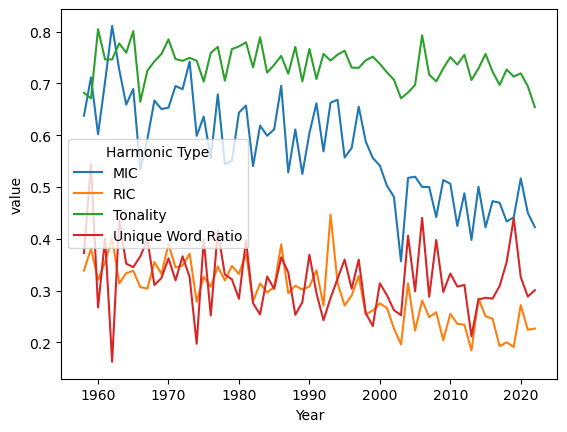

In [184]:
sns.lineplot(data=yearly_avg3, x='Year', y='value', hue='Harmonic Type')
plt.show()

In [194]:
g = SONGS3.corr()
g

,Year,Tonality,MIC,RIC,Unique Word Ratio
Year,1.000000,-0.090740,-0.464221,-0.414193,-0.081983
Tonality,-0.090740,1.000000,0.222972,0.044163,-0.075550
MIC,-0.464221,0.222972,1.000000,0.598080,0.147320
RIC,-0.414193,0.044163,0.598080,1.000000,0.218926
Unique Word Ratio,-0.081983,-0.075550,0.147320,0.218926,1.000000


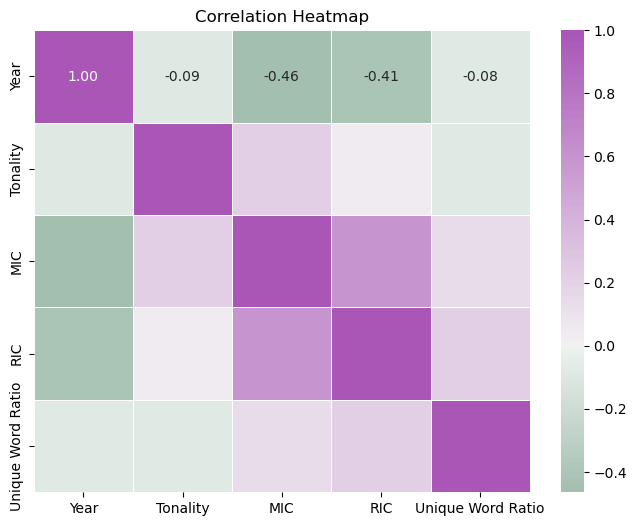

In [205]:
import matplotlib.colors as mcolors
plt.figure(figsize=(8,6))
custom_cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

sns.heatmap(g, cmap=custom_cmap, annot=True, fmt='.2f', linewidths=0.5, center=0.0)
plt.title("Correlation Heatmap")
plt.show()